In [1]:
from IPython.display import HTML
HTML('''<script>
code_show=true; 
function code_toggle() {
 if (code_show){
 $('div.input').hide();
 } else {
 $('div.input').show();
 }
 code_show = !code_show
} 
$( document ).ready(code_toggle);
</script>
The raw code for this IPython notebook is by default hidden for easier reading.
To toggle on/off the raw code, click <a href="javascript:code_toggle()">here</a>.''')

In [2]:
%%javascript
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [3]:
from IPython.display import display, HTML

display(HTML(data="""
<style>
    div#notebook-container    { width: 95%; }
    div#menubar-container     { width: 95%; }
    div#maintoolbar-container { width: 99%; }
</style>
"""))

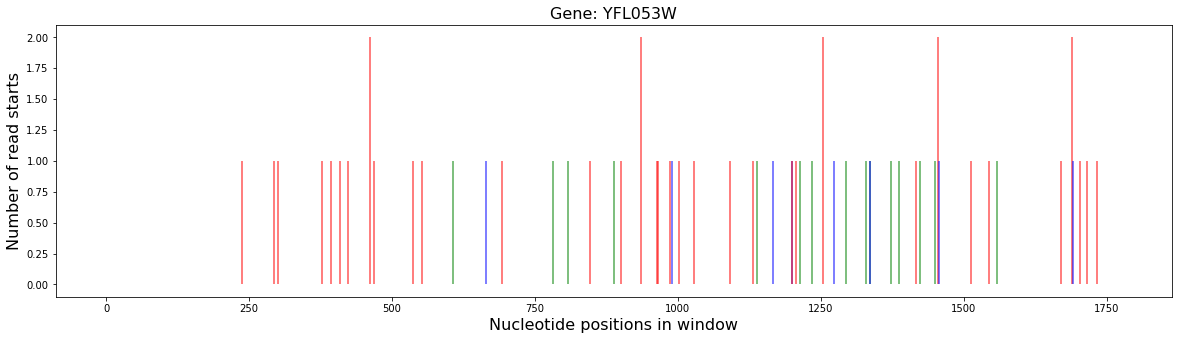

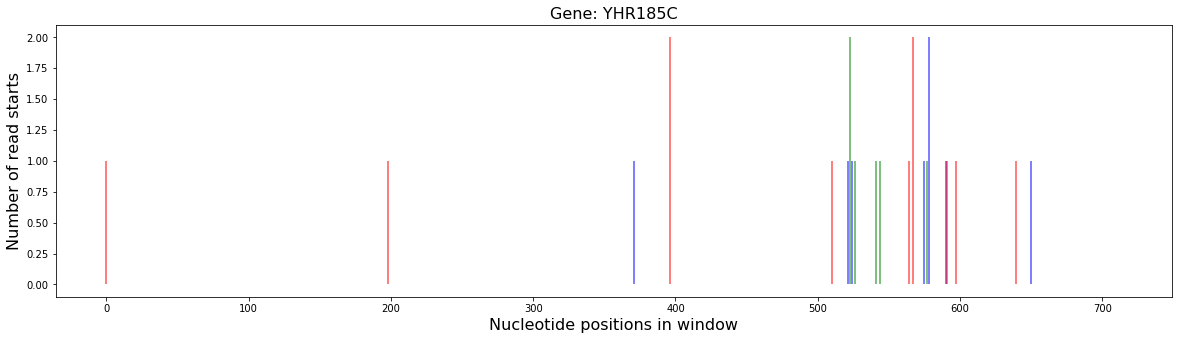

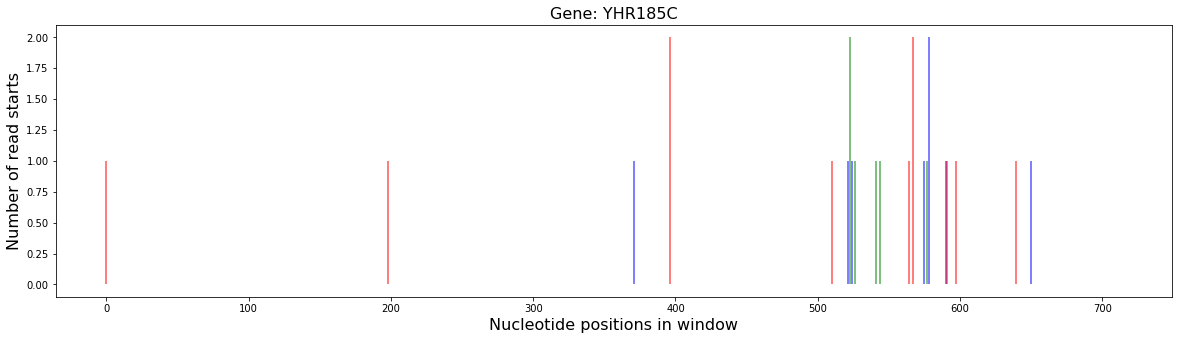

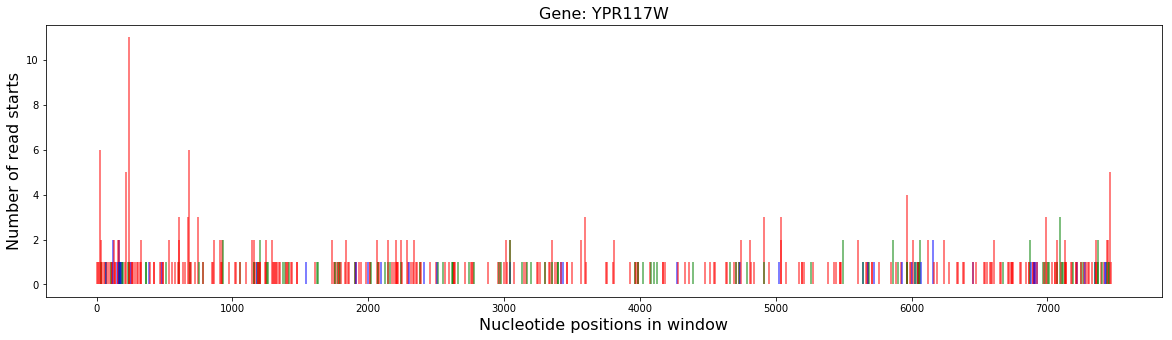

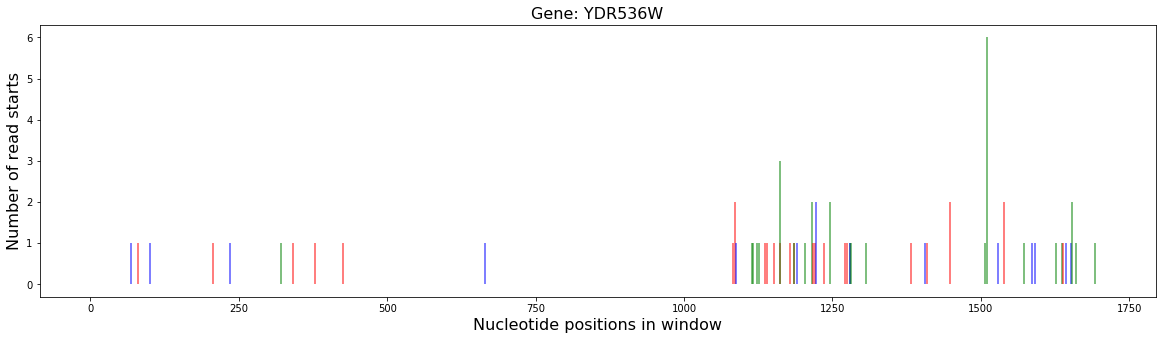

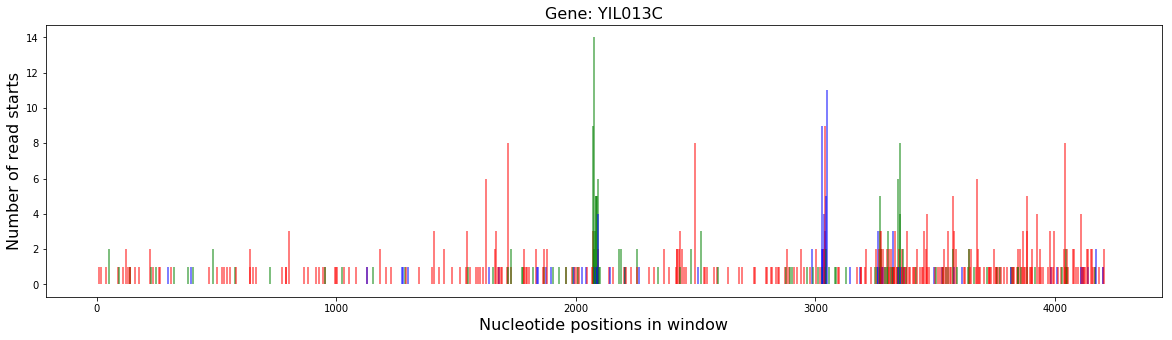

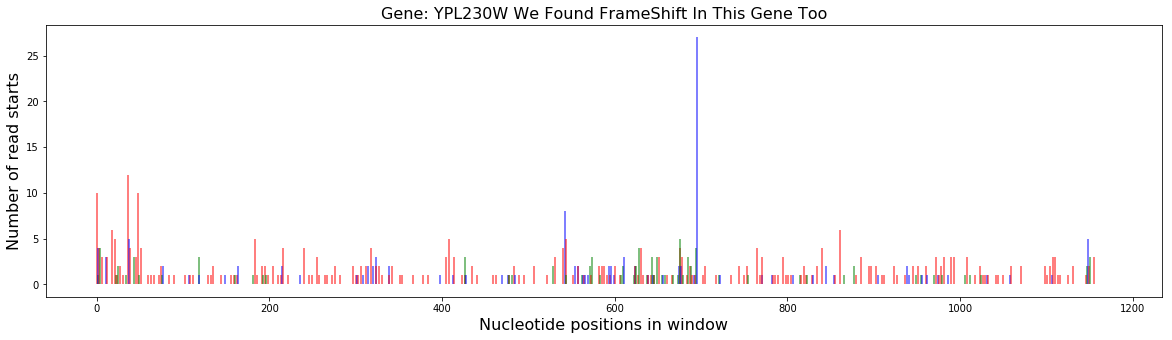

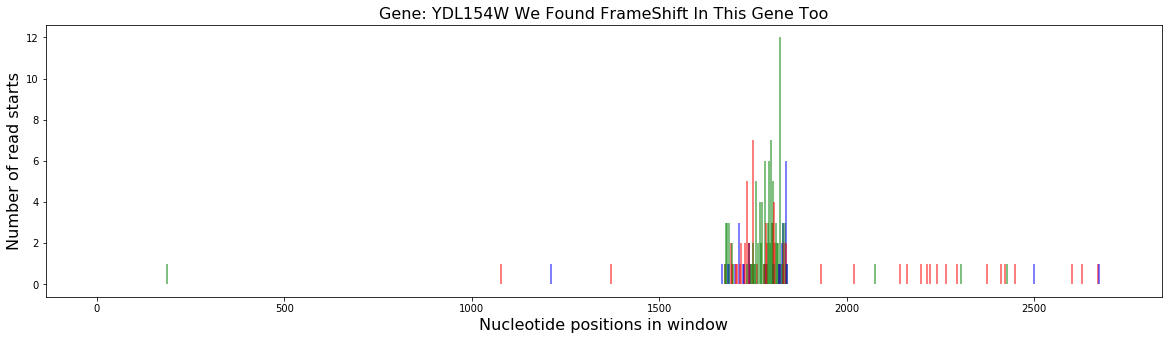

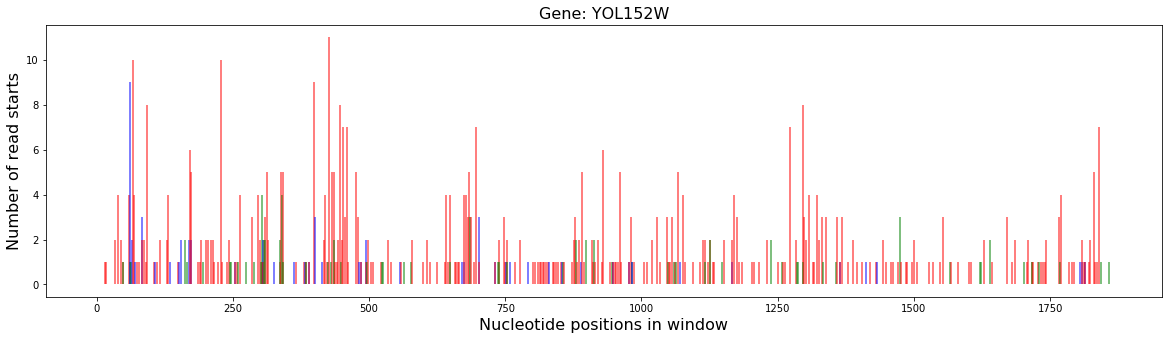

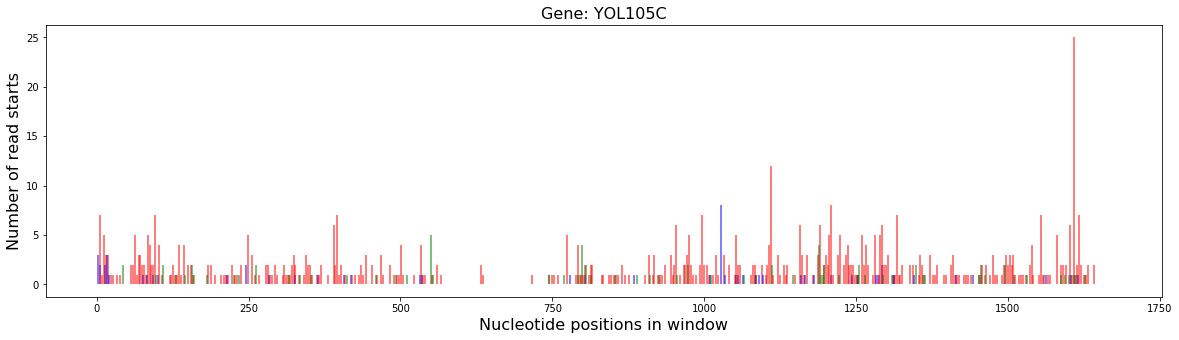

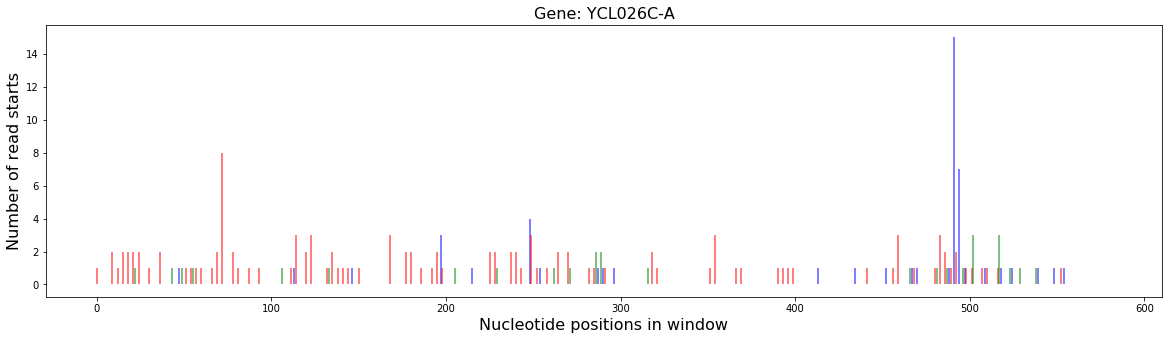

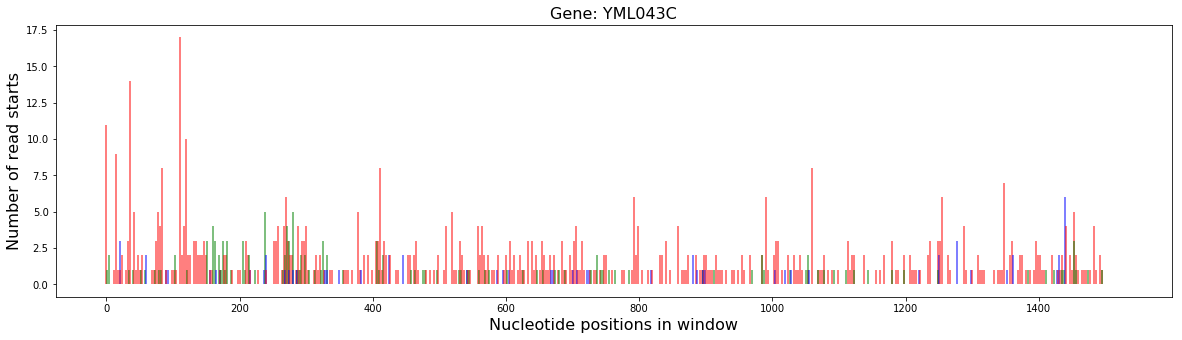

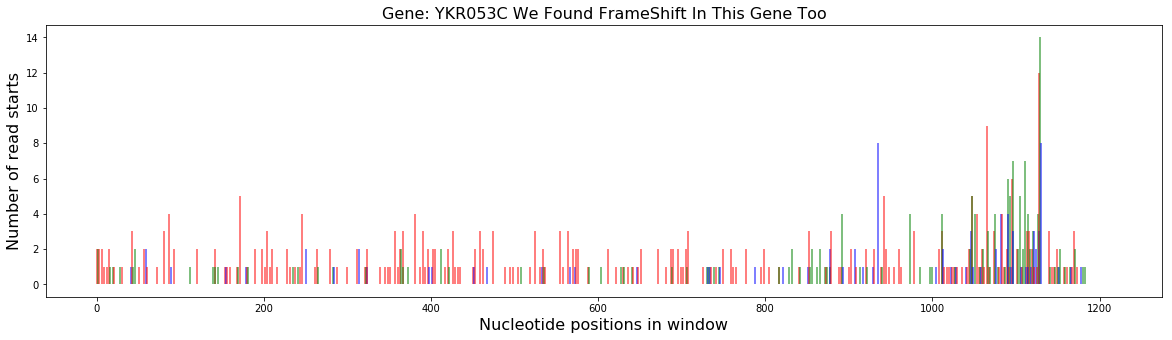

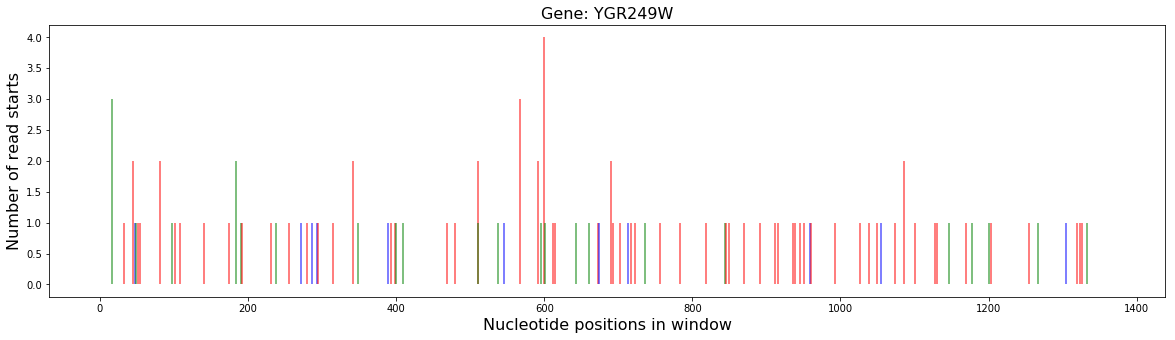

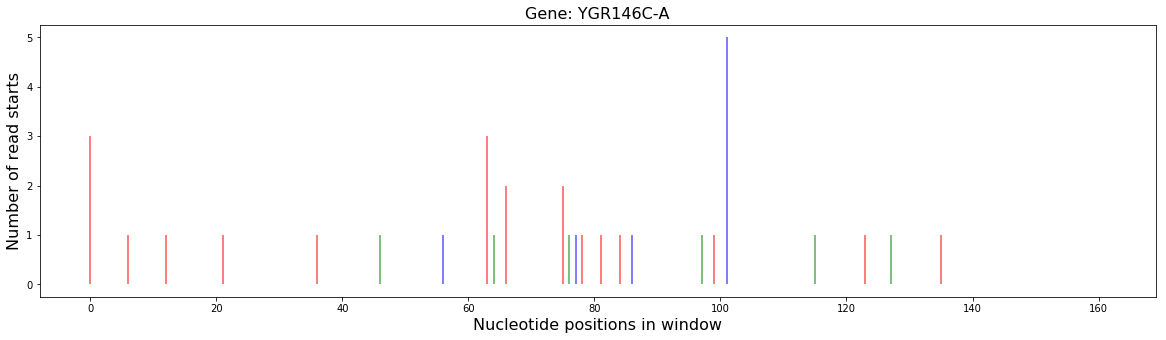

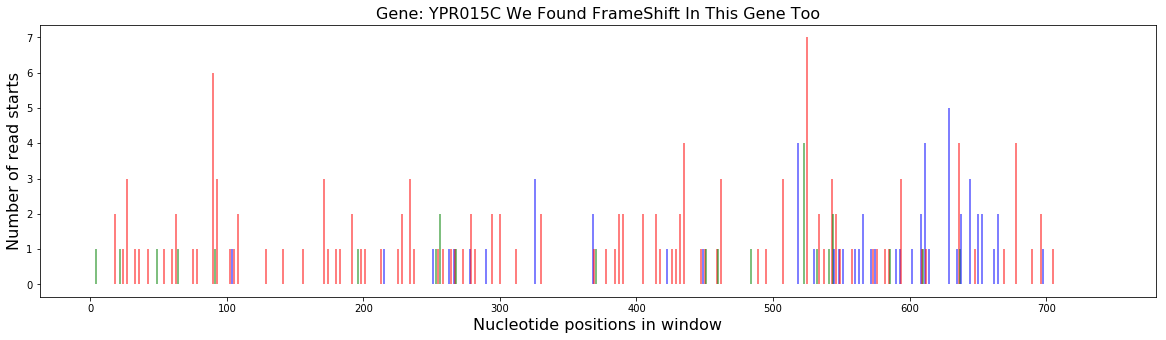

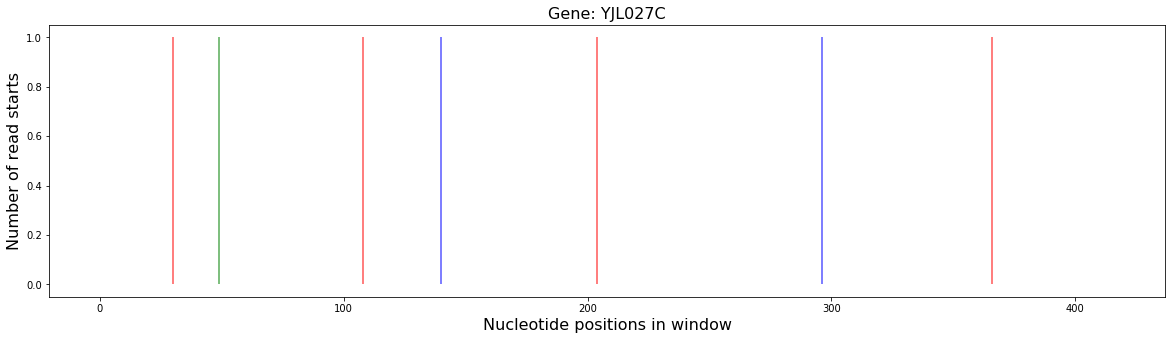

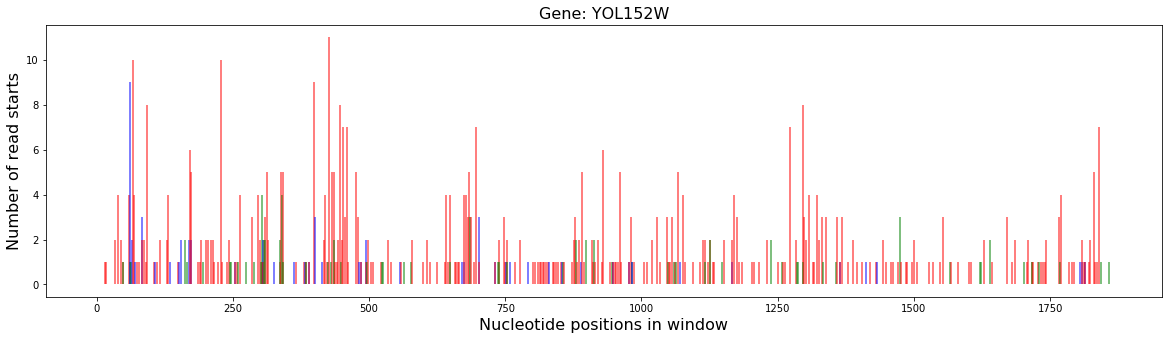

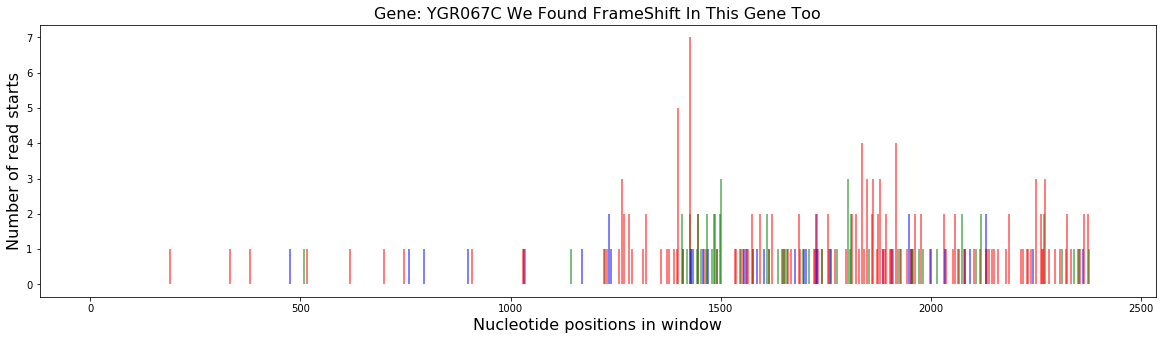

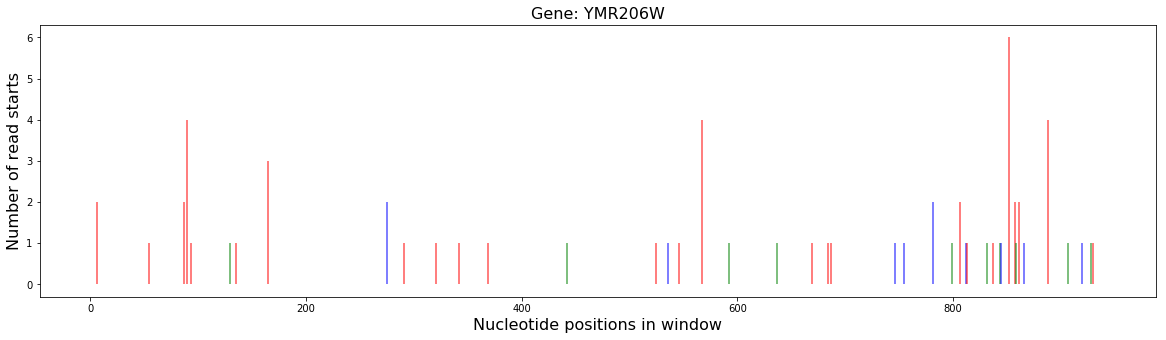

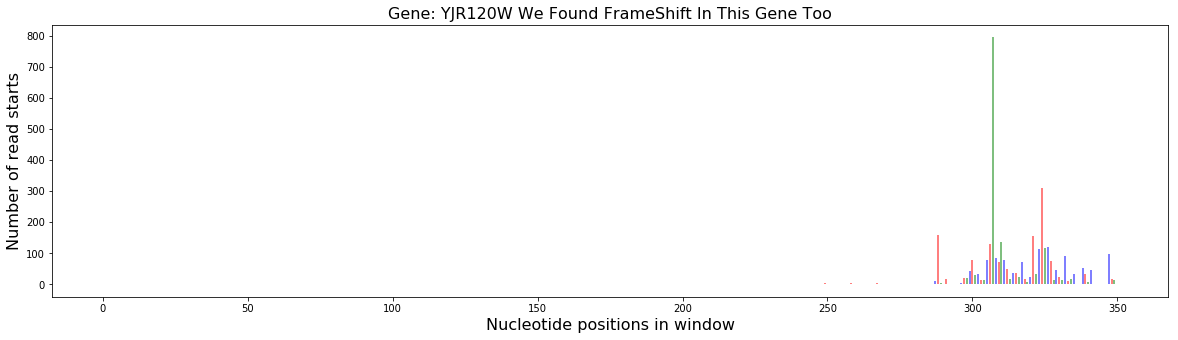

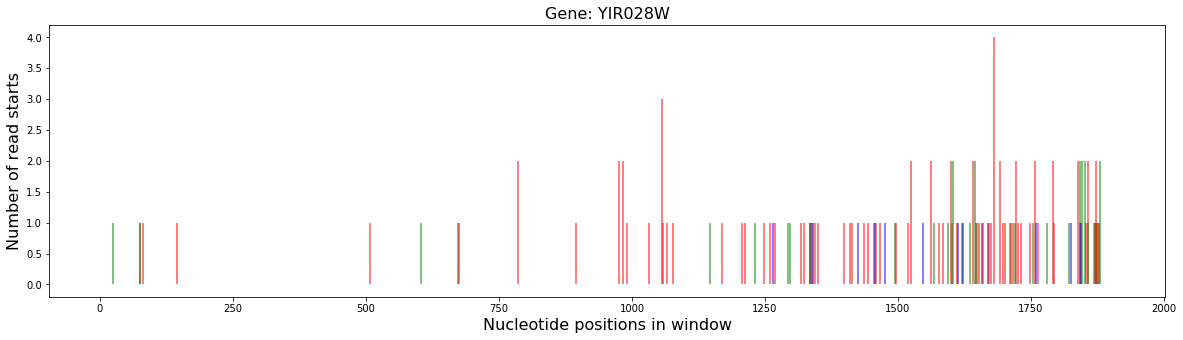

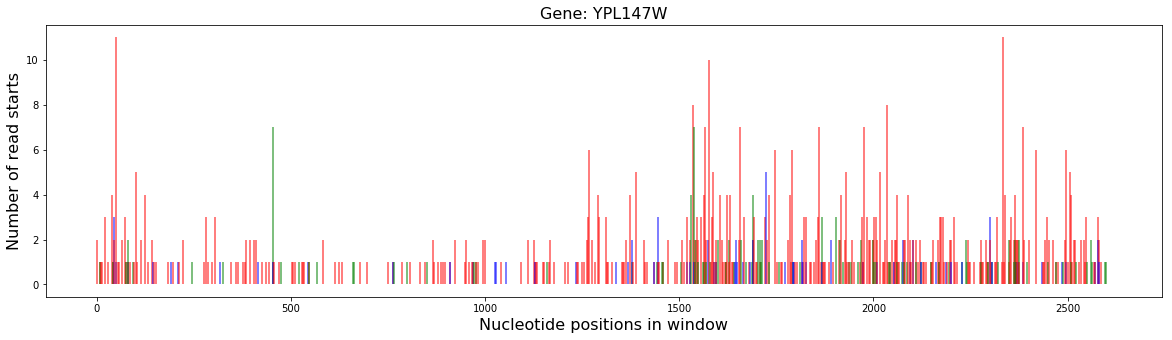

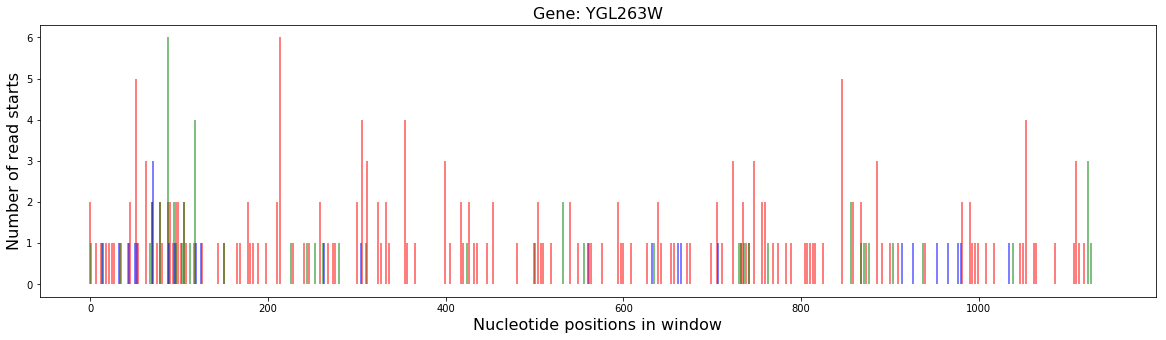

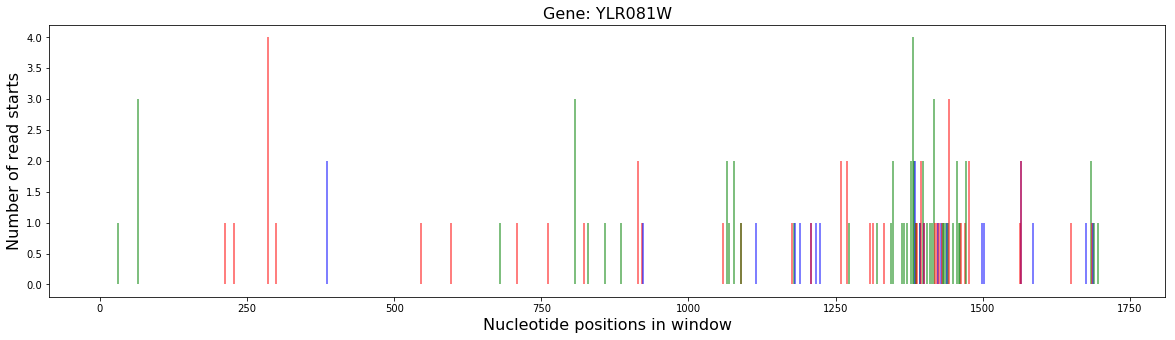

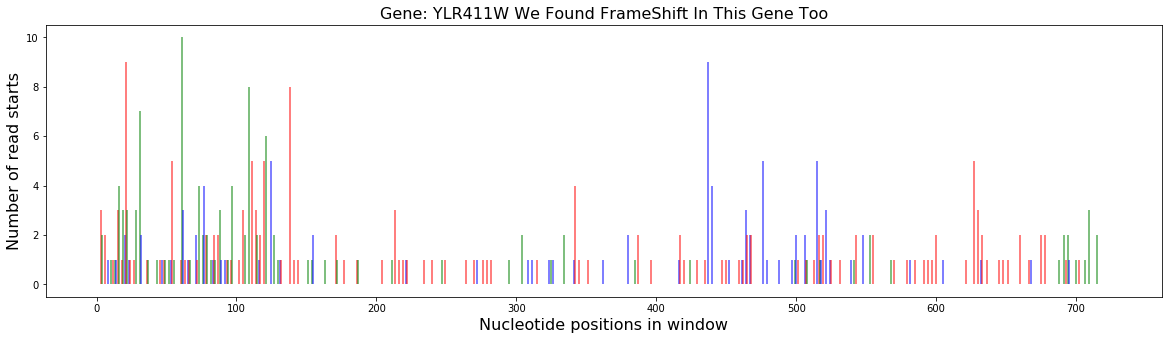

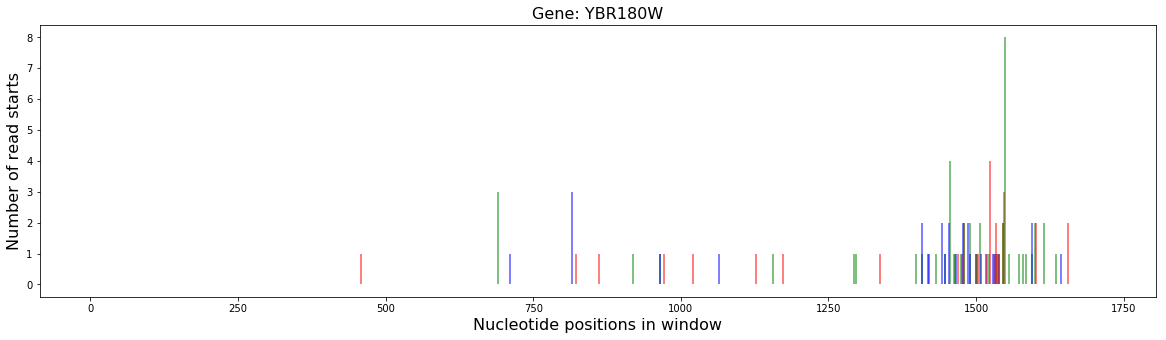

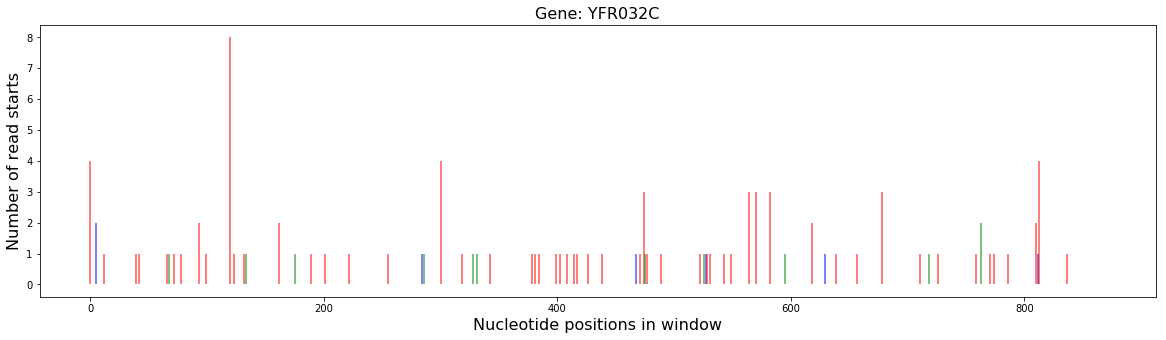

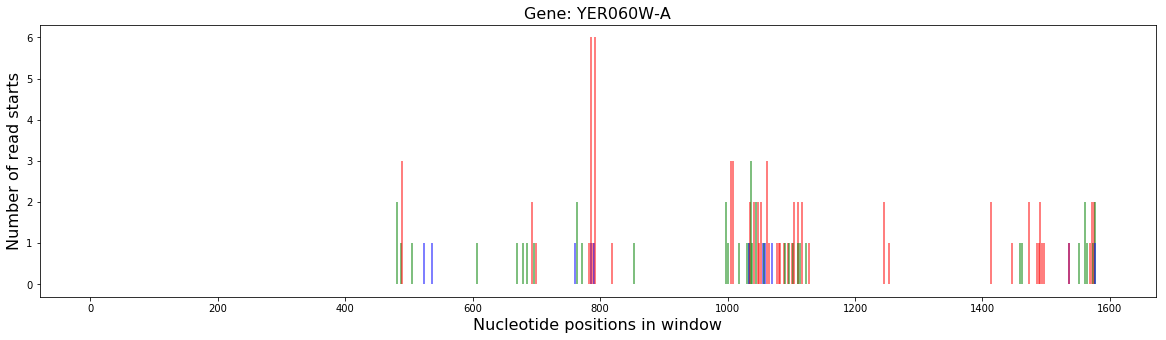

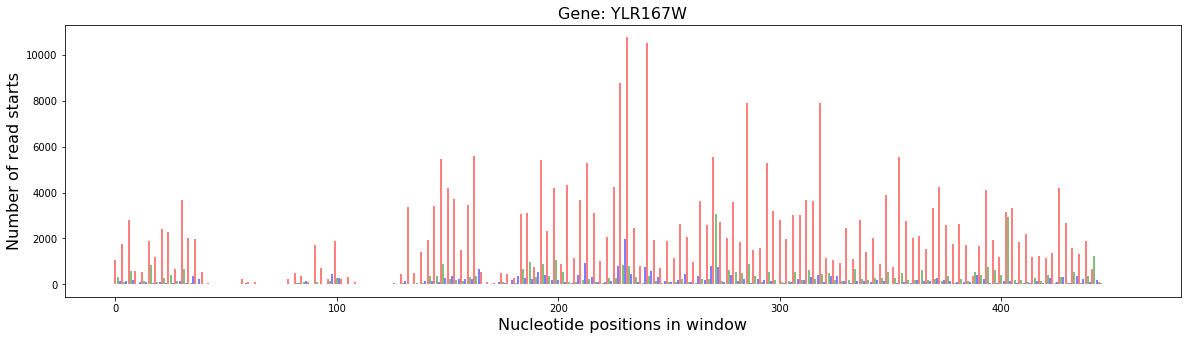

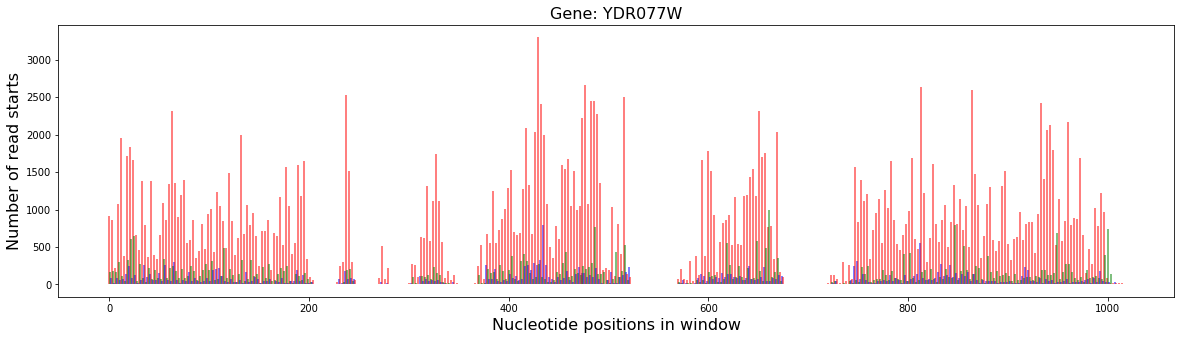

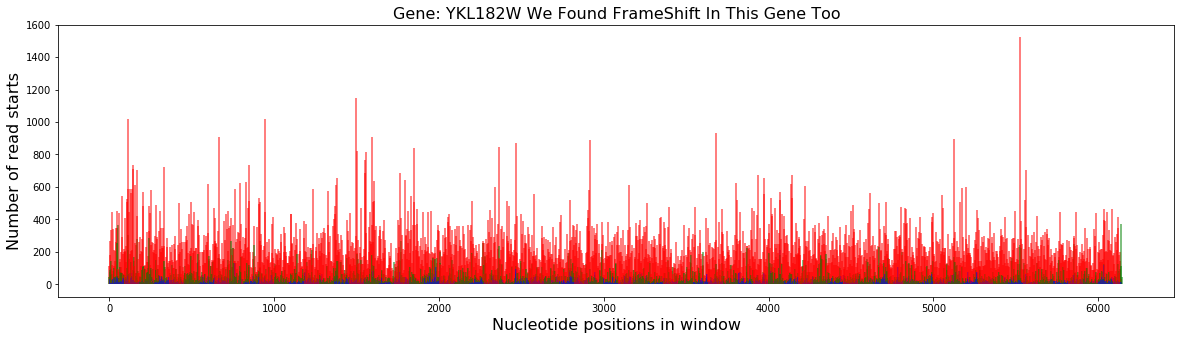

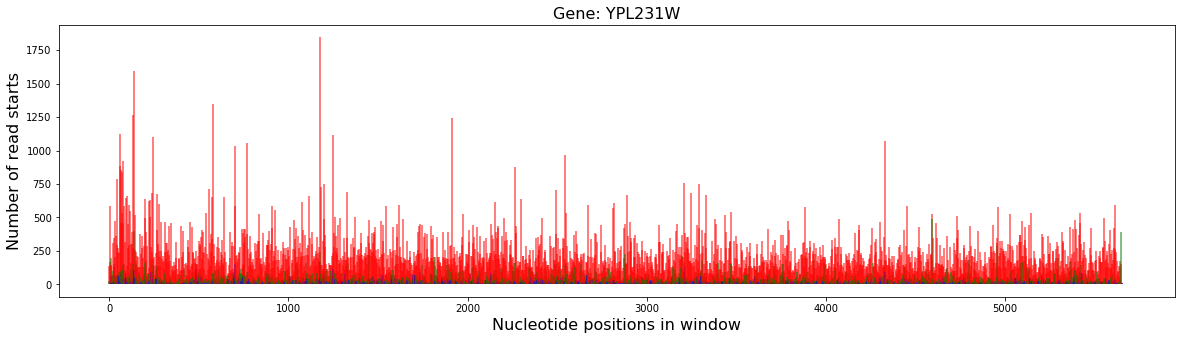

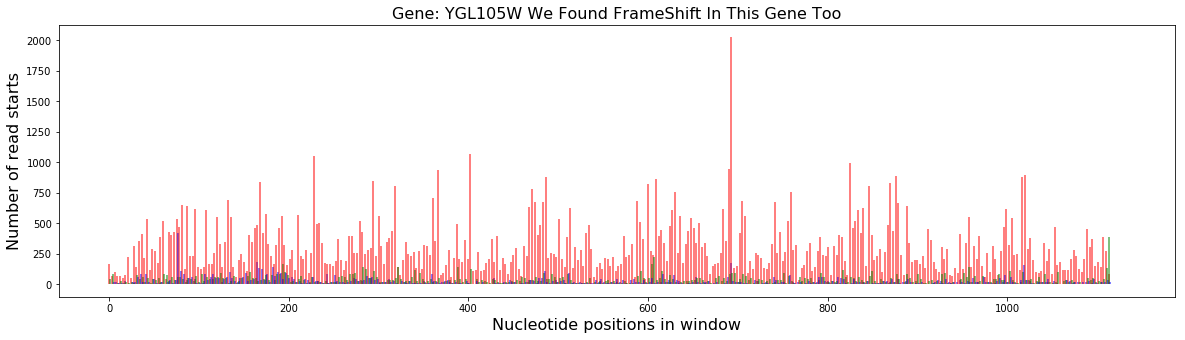

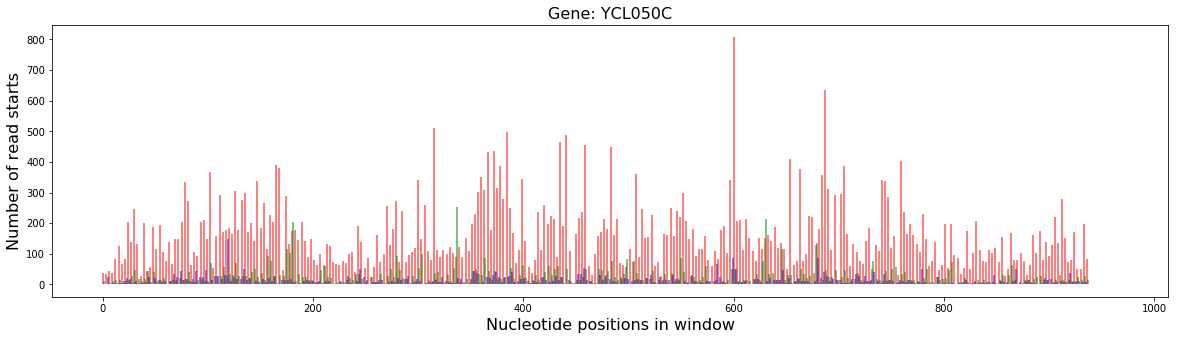

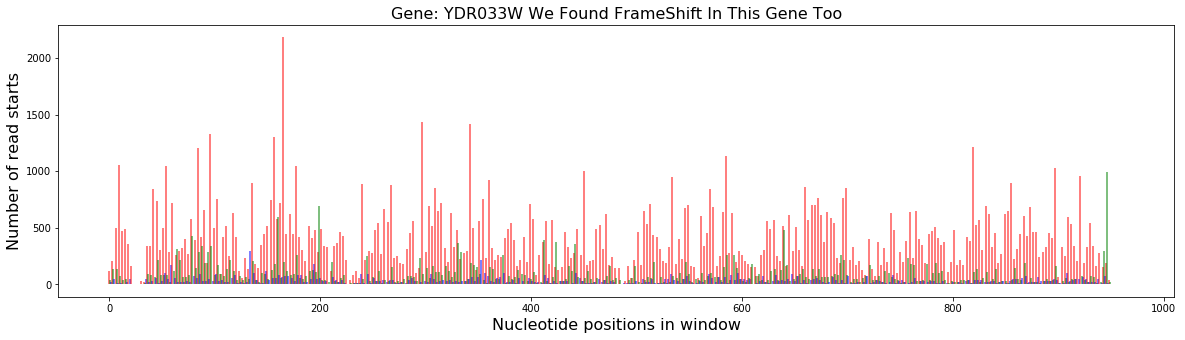

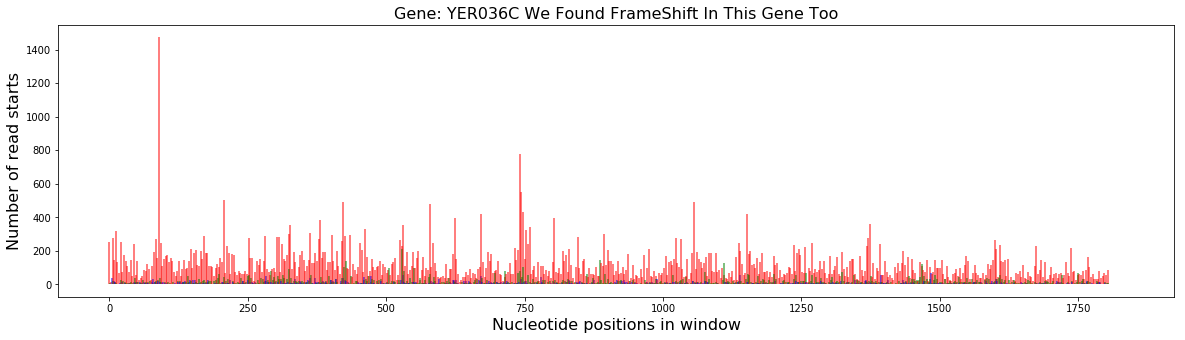

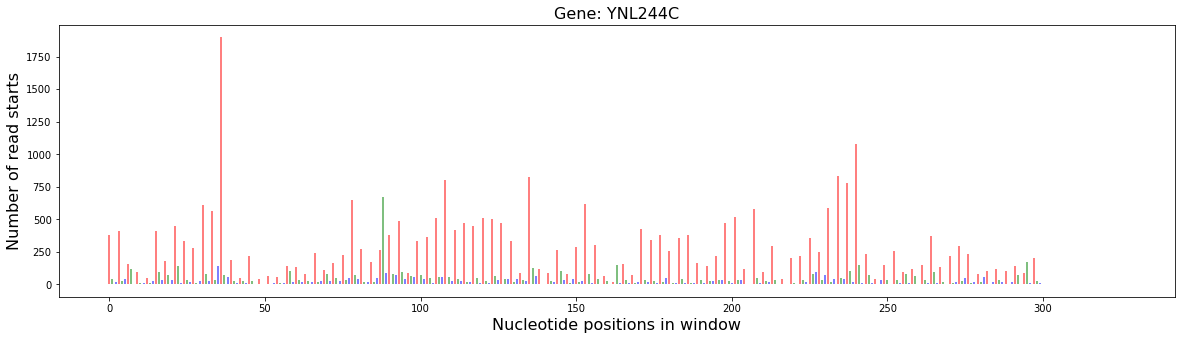

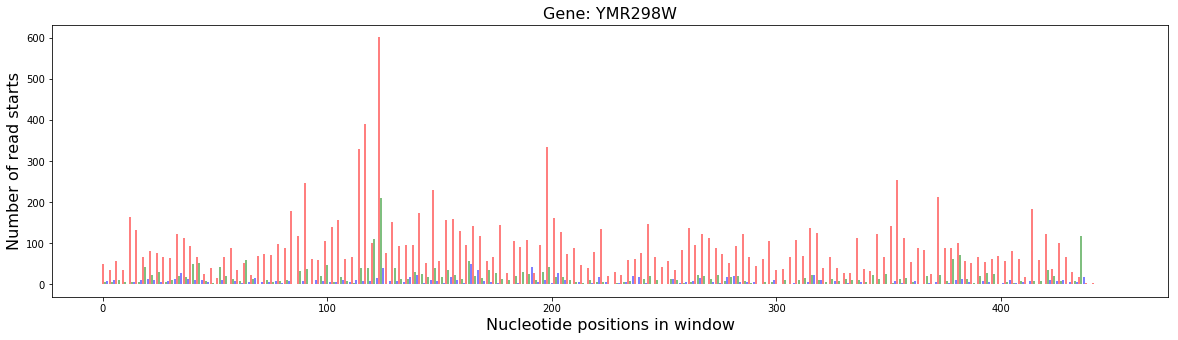

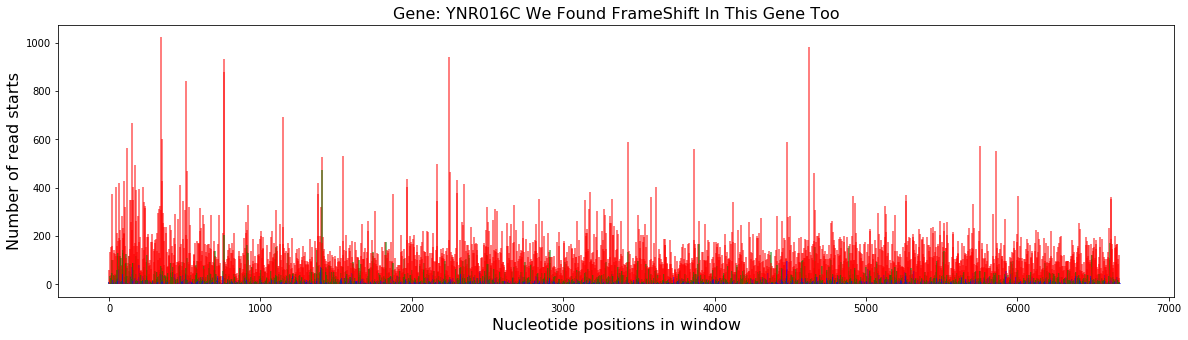

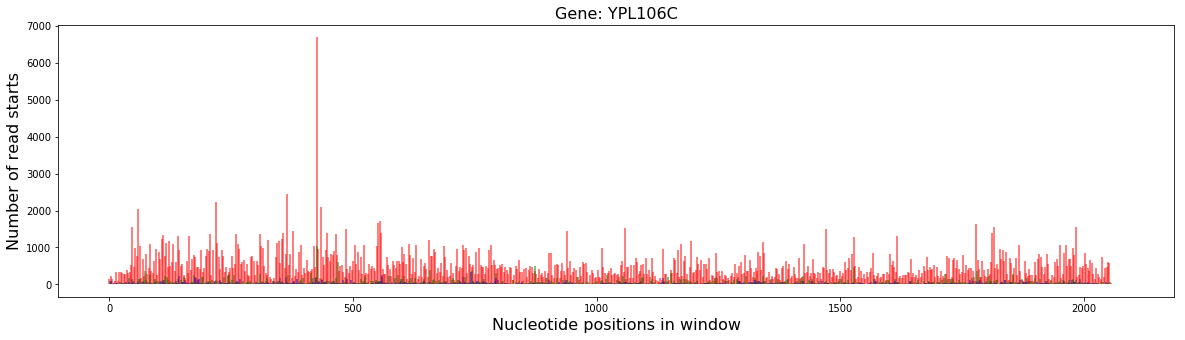

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import collections as matcoll
unsimulated_starts_dict = dict()                                                                                                                             
#inFile = open("output/all_jan2014_bowtie_unique_25_to_32_starts", "r")  
inFile = open("output/combined_starts_all_seven", "r")
gene = inFile.readline().strip()
lineListDict = dict()
while gene:                                                                                                                                                    
    seq = inFile.readline()                                                                                                                                   
    starts_string = inFile.readline()                                                                                                                          
    current_gene = gene                                                                                                                                        
    gene = inFile.readline().strip()                                                                                                                           
    lineList = [int(x) for x in starts_string.strip()[:-1].split(",")] 
    lineListDict[current_gene] = lineList
inFile = open("output/combined_starts_all_seven_with_found_frameshifts_approach_5.5", "r")
genePDict = dict()
geneShiftStartDict = dict()
geneShiftEndDict = dict()
for line in inFile:
    Info_string = line.strip()
    letters = inFile.readline().rstrip("\n").split(" ")
    reads_1 = inFile.readline().rstrip("\n").split(" ")
    reads_2 = inFile.readline().rstrip("\n").split(" ")
    percents = inFile.readline().rstrip("\n").split(",")
    blank = inFile.readline()
    gene_name = Info_string.split("\t")[0].split(" ")[1]
    p_value  = float(Info_string.split("\t")[1].split(" ")[1])

    
    detected_shift = int(Info_string.split("\t")[3].split(" ")[1])
    detected_shift_end = detected_shift + int(Info_string.split("\t")[4].split(" ")[1])

    genePDict[gene_name] = p_value
    geneShiftStartDict[gene_name] = detected_shift
    geneShiftEndDict[gene_name] = detected_shift_end
inFile = open("output/Justin_found_frameshifts")

for line in inFile:
    Info_string = line.strip()
    gene_name = Info_string.split("\t")[0].split(" ")[1]
    lines = []
    lineList = lineListDict[gene_name]
    for i in range(0, len(lineList)):  # YDL061C,87,140,-1,0.05; -54.349  #YLR388W,75,140,-1,0.05; -30.754
        pair=[(i,0), (i, lineList[i])]
        lines.append(pair)
    linecoll = matcoll.LineCollection(lines, colors=["red","green", "blue"], linewidths=[2], alpha=0.5)
    fig, (ax1) = plt.subplots(1, 1, figsize=(20, 5))
    ax1.add_collection(linecoll)
    found_by_us = ""
    if (gene_name in genePDict):
        found_by_us = " We Found FrameShift In This Gene Too"
    ax1.autoscale_view()
    ax1.set_title("Gene: " + str(gene_name) + found_by_us,fontsize=16)
    ax1.set_xlabel('Nucleotide positions in window',fontsize=16)
    ax1.set_ylabel('Number of read starts',fontsize=16)
    
    
    plt.show()